In [1]:
import pickle

# Charger les données prétraitées à partir du fichier pickle
with open('donnees_traitees.pkl', 'rb') as f:
    df = pickle.load(f)


In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [3]:
import xgboost as xgb
# Supprimer les lignes contenant des valeurs manquantes
df_clean = df
# Séparer les variables indépendantes et la variable dépendante
X = df_clean.drop(['MIS_Status'], axis=1)
y = df_clean['MIS_Status']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Créer le transformateur pour les colonnes catégorielles
categorical_features = ['NAICS', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Créer le transformateur pour les colonnes numériques
numerical_features =['ApprovalFY', 'Term', 'GrAppv', 'NewExist']
numerical_transformer = SimpleImputer(strategy='mean')



# Créer le ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
        ])

# Créer le pipeline
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier())])

# Entraîner le modèle
pipeline_xgb.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['ApprovalFY', 'Term',
                                                   'GrAppv', 'NewExist']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['NAICS', 'RetainedJob',
                                                   'FranchiseCode',
                                                   'UrbanRural',
                                                   'RevLineCr'])])),
                ('classi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

Matrice de confusion:

Accuracy:
0.9392000411157795


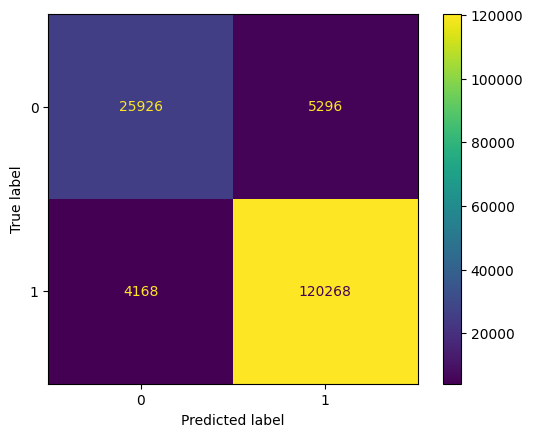

In [4]:
# Prédire les classes pour les données de test
y_pred = pipeline_xgb.predict(X_test)

# Calculer les métriques
print("Matrice de confusion:")
cf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

cf_matrixD = ConfusionMatrixDisplay(cf_matrix)
cf_matrixD.plot()


In [5]:
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     31222
           1       0.96      0.97      0.96    124436

    accuracy                           0.94    155658
   macro avg       0.91      0.90      0.90    155658
weighted avg       0.94      0.94      0.94    155658

